<a href="https://colab.research.google.com/github/pedro-hnrq/House-Price/blob/second_module/Limpeza_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Advanced Regression Techniques


---


(Preços de Casas )

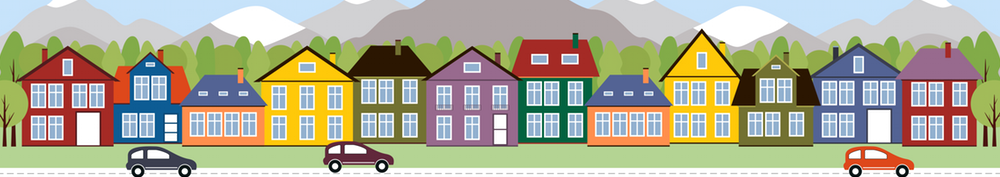

Disponível: [Preços de Casas](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)






## **2° Parte** - Limpeza dos Dados

In [19]:
# Importa Pandas
import pandas as pd

In [20]:
# Importa os datasets
train = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")

In [21]:
# Visualizado
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Explorando os Dados



In [22]:
# Visualizado quantidade de valores vazios
train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [23]:
# Visualizado % a quantidade de valores vazios
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

***As 4 primeiras colunas tem mais de 80% dos valores vazios na base de treino***



*   Ao invés de eliminar essas colunas, vamos entender cada um dos dados:
  *   **PoolQC:** Qualidade da piscina
      *   NA: No Pool
  *   **MiscFeature:** Qualquer recurso não considerado nas outras categorias
      *   NA: None
  *   **Alley:** Tipo de beco / ruela para acesso a propriedade
      *   NA: No alley access
  *   **Fence:** Qualidade da cerca
      *   NA: No Fence


*   Nesse caso o NA não é ausência de informação, *ele é uma informação*

*   Podemos entender melhor os dados nessas colunas e principalmente sua **relação com o preço de venda**

In [24]:
# Substituir os valores vazios na primeira coluna por -1
train[['PoolQC','MiscFeature','Alley','Fence']] = train[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

### Visualização



*   [Matplotlib](https://matplotlib.org/stable/plot_types/index)
*   [Seaborn](https://seaborn.pydata.org/examples/grouped_boxplot.html)



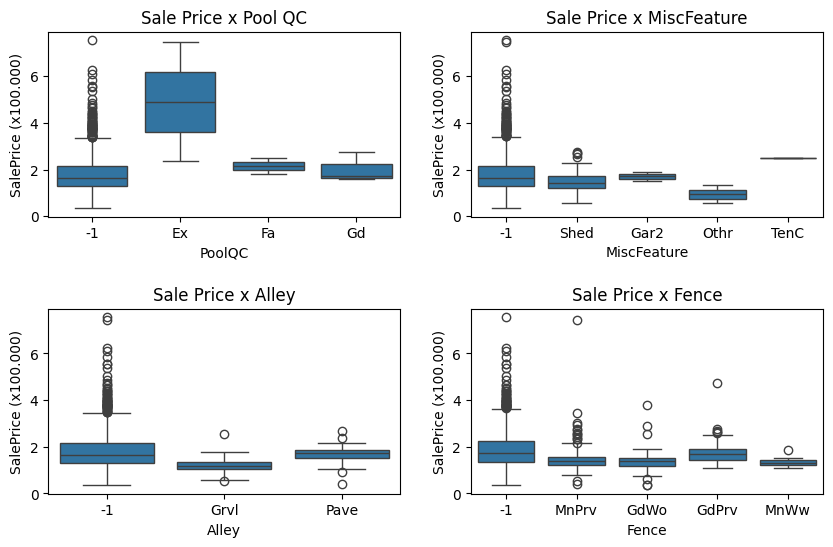

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,6))

# ax.scatter()

# sns.boxplot(data=train, x="PoolQC", y="SalePrice")


sns.boxplot(x=train.PoolQC,y=train.SalePrice/100000,ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice (x100.000)')
ax[0,0].set_title('Sale Price x Pool QC')
sns.boxplot(x=train.MiscFeature,y=train.SalePrice/100000,ax=ax[0,1])
ax[0,1].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('Sale Price x MiscFeature')
sns.boxplot(x=train.Alley,y=train.SalePrice/100000,ax=ax[1,0])
ax[1,0].set_ylabel('SalePrice (x100.000)')
ax[1,0].set_title('Sale Price x Alley')
sns.boxplot(x=train.Fence,y=train.SalePrice/100000,ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice (x100.000)')
ax[1,1].set_title('Sale Price x Fence')

plt.subplots_adjust(hspace=0.5)

plt.show()

### Realiza mesmos tratamentos para a base de teste

   *   Automatizar esse processo.



In [26]:
# Verificando o shape da base de treino
test.shape

(1459, 80)

In [27]:
# Ajustando também para a base de teste
test[['PoolQC','MiscFeature','Alley','Fence']] = test[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [28]:
# Verificando o shape da base de teste
test.shape

(1459, 80)

In [29]:
# Visualizando a quantidade de registros em cada rótulo
train[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
dtype: int64

In [30]:
# Ajustando essa coluna
train[['FireplaceQu']] = train[['FireplaceQu']].fillna(-1)

In [31]:
# Visualizando a quantidade de registros em cada rótulo
test[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
dtype: int64

In [32]:
test[['FireplaceQu']] = test[['FireplaceQu']].fillna(-1)

### Visualizando novamente as informações de valores vazios

In [33]:
# Calculando % a quantidade de valores vazios
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False).head(10)

LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtFinType1    0.025342
dtype: float64

In [34]:
# Verificando a quantidade de valores
train.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageFinish     81
GarageCond       81
GarageYrBlt      81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
dtype: int64

### LotFrontage: Pés lineares (medida de distância) de rua conectados à propriedade

In [35]:
# Entendendo os tipos de propriedades que possuem valor nulo
train.loc[train.LotFrontage.isnull(),'LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [36]:
# Verificando a minimo por tipo de propriedade
train.groupby('LotConfig')['LotFrontage'].min()

LotConfig
Corner     24.0
CulDSac    30.0
FR2        24.0
FR3        35.0
Inside     21.0
Name: LotFrontage, dtype: float64

In [37]:
# Verificando a média por tipo de propriedade
train.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64



*   Nesse caso o valor vazio **parece um erro da base.**



In [40]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('LotConfig')['LotFrontage'].transform('mean'))

In [39]:
test['LotFrontage'] = test['LotFrontage'].fillna(test.groupby('LotConfig')['LotFrontage'].transform('mean'))

### Garagem


*   **GarageType:** Garage location
  * NA: No Garage
*   **GarageYrBlt:** Year garage was built
*   **GarageFinish:** Interior finish of the garage
  * NA: No Garage
*   **GarageCars**: Size of garage in car capacity
*   **GarageArea:** Size of garage in square feet
*   **GarageQual:** Garage quality
  * NA: No Garage
*   **GarageCond:** Garage condition
  * NA: No Garage



In [48]:
# Verificando as colunas que possuem garagem no nome
col_garagem = train.columns[train.columns.str.contains("Garage")]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [49]:
# Filtrando a base
train.loc[:,col_garagem]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0        Attchd       2003.0          RFn           2         548         TA   
1        Attchd       1976.0          RFn           2         460         TA   
2        Attchd       2001.0          RFn           2         608         TA   
3        Detchd       1998.0          Unf           3         642         TA   
4        Attchd       2000.0          RFn           3         836         TA   
...         ...          ...          ...         ...         ...        ...   
1455     Attchd       1999.0          RFn           2         460         TA   
1456     Attchd       1978.0          Unf           2         500         TA   
1457     Attchd       1941.0          RFn           1         252         TA   
1458     Attchd       1950.0          Unf           1         240         TA   
1459     Attchd       1965.0          Fin           1         276         TA   

     GarageCond  
0            TA  
1            TA  
2            TA  
3            TA  
4            TA  
...         ...  
1455         TA  
1456         TA  
1457         TA  
1458         TA  
1459         TA  

[1460 rows x 7 columns]